#Task 5 Scenario 4
Runs scenario 4 and creates the flux density diagram.

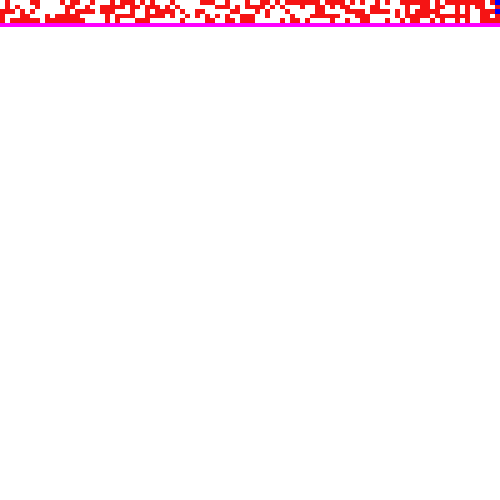

density : 0.5 
 avg speed at measuring points  
1.0 
0.9999999999999458 
0.999999999999944 




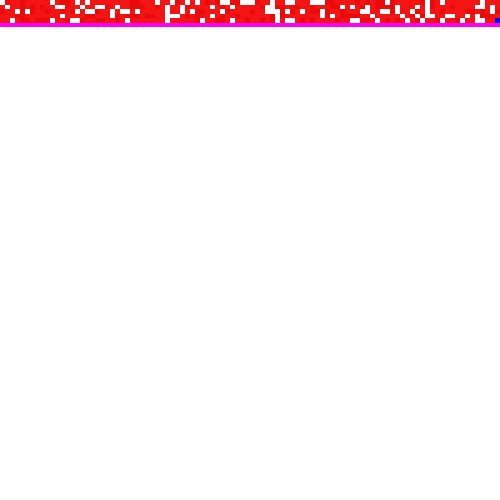

density : 1 
 avg speed at measuring points  
1.0 
0.9999999999999442 
0.9999999999999453 




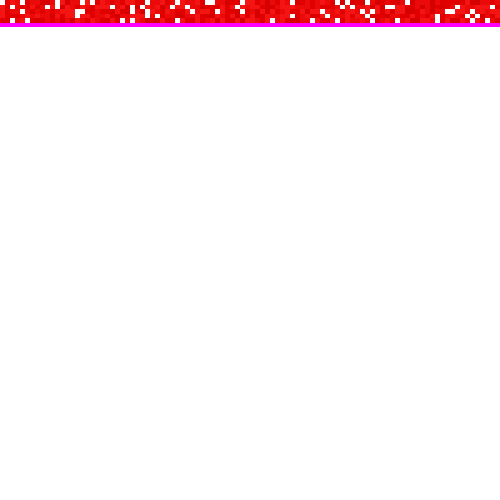

density : 2 
 avg speed at measuring points  
0.9955555555555555 
0.9942528735631688 
0.364413364413344 




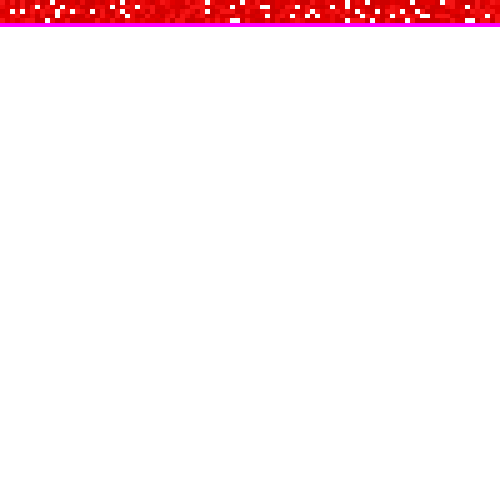

density : 3 
 avg speed at measuring points  
0.16883210180623973 
0.13905239687847565 
0.08229665071769898 




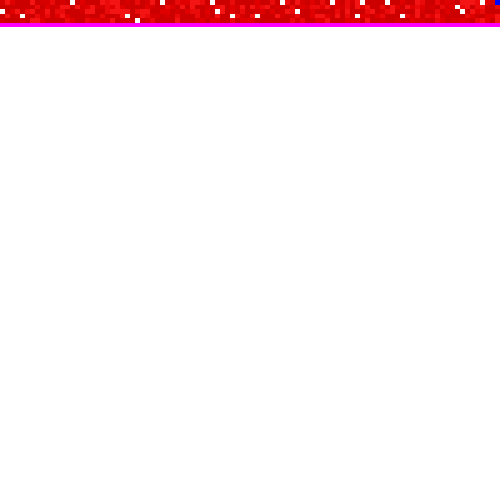

density : 4 
 avg speed at measuring points  
0.0 
0.0 
0.0 




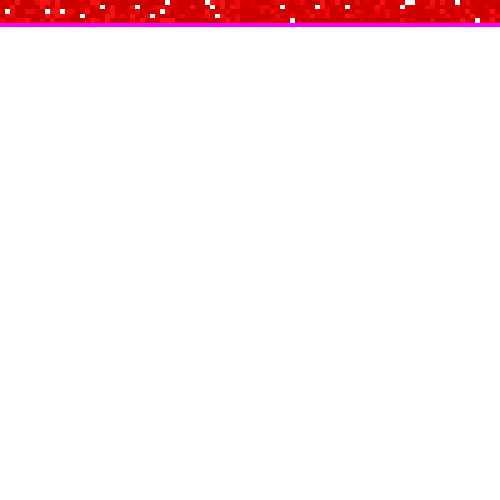

density : 5 
 avg speed at measuring points  
0.0 
0.0 
0.0 




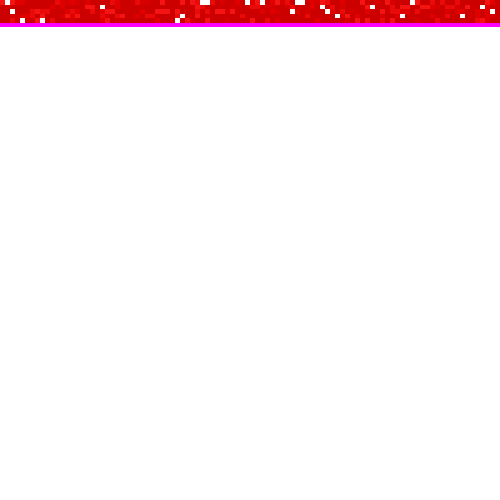

density : 6 
 avg speed at measuring points  
0.0 
0.0 
0.0 




FileNotFoundError: [Errno 2] No such file or directory: 'latex/images/density_flow_plot.png'

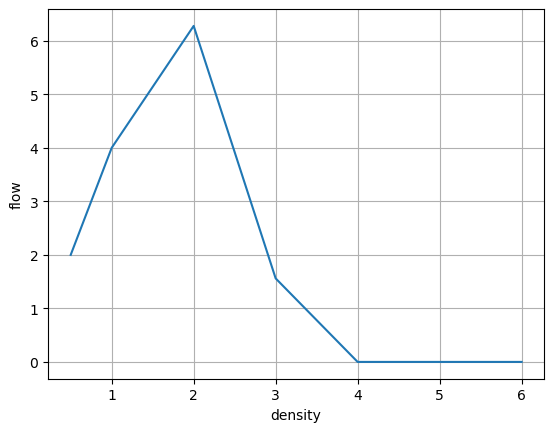

In [2]:
from scenario_maker import make_config_rimea_4
import IPython.display
import numpy as np
from jupiter_notebook_helpers import *
import matplotlib.pyplot as plt
import pedestrian_avoidance
from scipy.stats import ttest_ind
from no_gui import Simulation

densities = list(x for x in [0.5, 1, 2, 3, 4, 5, 6])
flows = []
for x in densities:
    measurement_functor = MeasurementFunctor()
    sn = f"scenarios/scenario_RIMEA-4-{x:.2f}.json"
    make_config_rimea_4(sn, x)
    s, i = Simulation().run(sn, measurement_functor.run, IPython.display.display,
                            pedestrian_avoidance.get_coefficients(2, 2, 1 / 100), 50)
    speedstring = ''
    for y in measurement_functor.measure_point_avg_speeds:
        speedstring = f"{speedstring} \n{np.average(y)}"
    print(f"density : {x} \n avg speed at measuring points {speedstring} \n\n")
    #Multiply by 4 because the timescale in the simulation is 1/2 and the distance scale is 1/2
    flows.append(4 * x * np.average(
        list(x for x in list(np.average(x) for x in measurement_functor.measure_point_avg_speeds) if not np.isnan(x))))
plt.clf()
ax1 = plt.axes()
hb = ax1.plot(densities, flows)
ax1.set_xlabel("density")
ax1.set_ylabel("flow")
ax1.grid()

plt.savefig(f"images/density_flow_plot")
plt.show()